In [2]:
from keras.datasets import mnist
from keras.utils import to_categorical
import numpy as np
import sys
import tensorflow as tf

import matplotlib.pyplot as plt

In [3]:
seed = 0;
np.random.seed(seed)
tf.random.set_seed(seed)

In [4]:
# Load the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
print("x_train shape:", x_train.shape, "x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape, "y_test shape:", y_test.shape)

x_train shape: (60000, 28, 28) x_test shape: (10000, 28, 28)
y_train shape: (60000,) y_test shape: (10000,)


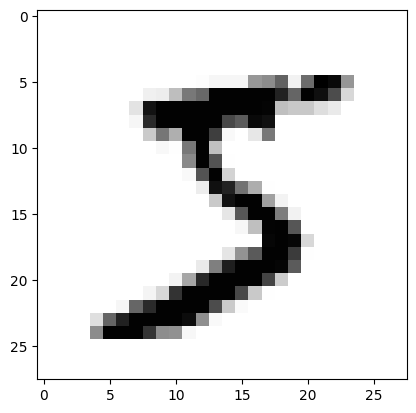

In [6]:
plt.imshow(x_train[0], cmap='Greys')
plt.show()

In [7]:
x_train = x_train.reshape(60000, 784).astype('float32') / 255.0
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0

In [8]:
print("class label for first sample in x_train: ", y_train[0])

class label for first sample in x_train:  5


In [9]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint,EarlyStopping
import os

In [11]:
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model = Sequential([
    Dense(512, input_dim=784, activation='relu'),
    Dense(10, activation='softmax')
])



In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [14]:
run = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])


Epoch 1: val_loss improved from inf to 0.15190, saving model to ./model/01-0.1519.hdf5


/Users/matia/anaconda3/envs/py38/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 0.15190 to 0.10679, saving model to ./model/02-0.1068.hdf5

Epoch 3: val_loss improved from 0.10679 to 0.08110, saving model to ./model/03-0.0811.hdf5

Epoch 4: val_loss improved from 0.08110 to 0.07755, saving model to ./model/04-0.0775.hdf5

Epoch 5: val_loss improved from 0.07755 to 0.06818, saving model to ./model/05-0.0682.hdf5

Epoch 6: val_loss improved from 0.06818 to 0.06648, saving model to ./model/06-0.0665.hdf5

Epoch 7: val_loss improved from 0.06648 to 0.06424, saving model to ./model/07-0.0642.hdf5

Epoch 8: val_loss improved from 0.06424 to 0.06351, saving model to ./model/08-0.0635.hdf5

Epoch 9: val_loss improved from 0.06351 to 0.06098, saving model to ./model/09-0.0610.hdf5

Epoch 10: val_loss did not improve from 0.06098

Epoch 11: val_loss did not improve from 0.06098

Epoch 12: val_loss did not improve from 0.06098

Epoch 13: val_loss did not improve from 0.06098

Epoch 14: val_loss did not improve from 0.06098

Epoch 15: val_loss

In [15]:
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))

313/313 [==============================] - 0s 797us/step - loss: 0.0686 - accuracy: 0.9822

 Test Accuracy: 0.9822


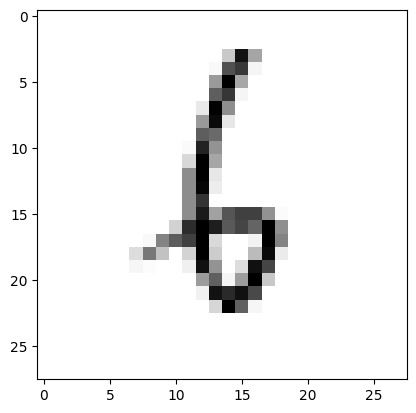

(28, 28, 1)
1/1 [==============================] - 0s 34ms/step
Predicted label: 6
Expected label: 6


In [16]:
from keras.models import load_model
# Select a random index from x_test
index = np.random.randint(0, len(x_test))



# Get the corresponding image from x_test
image = x_test[index]

# Specify the path to the model file
model_file = './model/01-0.1518.hdf5'

# Load the model
new_model = load_model(model_file)

#print("\n Test Accuracy: %.4f" % (new_model.evaluate(x_test, y_test)[1]))

test = image.reshape(28, 28, 1)
plt.imshow(test, cmap='Greys')
plt.show()
print(test.shape)


# Reshape the image to match the input shape of the model
image = image.reshape(1, 784)

# Make the prediction
prediction = new_model.predict(image)

# Get the predicted class label
predicted_label = np.argmax(prediction)

# Get the expected output label
expected_label = np.argmax(y_test[index])

# Print the predicted and expected labels
print("Predicted label:", predicted_label)
print("Expected label:", expected_label)


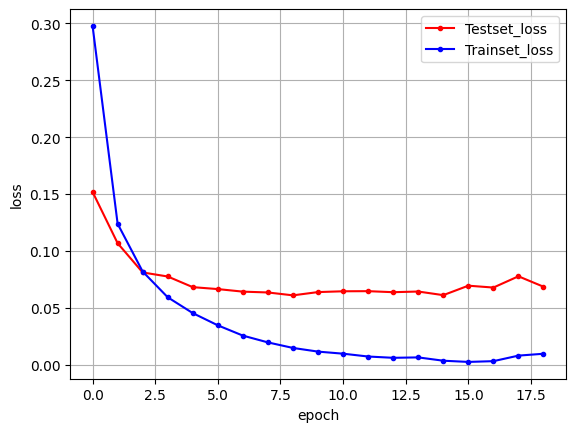

In [17]:
# Plotting the loss values for the train and test sets

# Get the validation loss values from the training history
y_vloss = run.history['val_loss']

# Get the training loss values from the training history
y_loss = run.history['loss']

# Create an array of x values for the number of epochs
x_len = np.arange(len(y_loss))

# Plot the test set loss values
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')

# Plot the train set loss values
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

# Add a legend to the plot
plt.legend(loc='upper right')

# Add grid lines to the plot
plt.grid()

# Add labels to the x and y axes
plt.xlabel('epoch')
plt.ylabel('loss')

# Display the plot
plt.show()